In [1]:
import pandas as pd
import numpy as np
import os
import nltk
import matplotlib.pyplot as plt
from string import punctuation
from nltk.tokenize import word_tokenize
from sklearn.datasets import load_files
import re
import seaborn as sns

In [2]:
train_path = r"20news-bydate-train"
test_path = r"20news-bydate-test"

In [3]:
folders = sorted(os.listdir(train_path))
folders

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

# Import Data


In [40]:
train_data = {}
for folder in folders: 
    train_data[folder] = []
    for doc in os.listdir(os.path.join(train_path, folder)):
        with open(os.path.join(train_path, folder, doc), encoding = 'latin-1') as opened_file:
            txt = opened_file.read()
            # ignore_header = txt.find("\n\n")
            # if(ignore_header > 0): 
            #     txt = txt[ignore_header+2:]
            train_data[folder].append(txt)


In [41]:
test_data = {}
for folder in folders: 
    test_data[folder] = []
    for doc in os.listdir(os.path.join(test_path, folder)):
        with open(os.path.join(test_path, folder, doc), encoding = 'latin-1') as opened_file:
            txt = opened_file.read()
            # ignore_header = txt.find("\n\n")
            # if(ignore_header > 0): 
            #     txt = txt[ignore_header+2:]
            test_data[folder].append(txt)


In [42]:
punctuations=list(punctuation)
stopwords = list(line.strip() for line in open(r"nltk_data/corpora/stopwords/english",encoding="utf8"))

for item in punctuations:
    stopwords.append(item)

In [43]:
new_stopwords = ['subject:','from:', 'date:', 'newsgroups:', 'message-id:', 'lines:', 'path:', 'organization:', 
            'would', 'writes:', 'references:', 'article', 'sender:', 'nntp-posting-host:', 'people', 
            'university', 'think', 'xref:', 'cantaloupe.srv.cs.cmu.edu', 'could', 'distribution:', 'first', 
            'anyone','world', 'really', 'since', 'right', 'believe', 'still']
stopwords.append(new_stopwords)
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [44]:
Y_train = []
for i in range(len(train_data)):
    for doc in train_data[folders[i]]:
        Y_train.append(folders[i])

Y_train = np.array(Y_train)

In [45]:
Y_test = []
for i in range(len(test_data)):
    for doc in test_data[folders[i]]:
        Y_test.append(folders[i])

Y_test = np.array(Y_test)

In [46]:
X_train = []
for folder in train_data:
    for doc in train_data[folder]:
        tokenized_doc = word_tokenize(doc)
        newdoc = []
        for word in tokenized_doc:
             if len(word) < 21 and len(word) > 1:
                if any(c.isdigit() for c in word): #or c == "_"
                    newdoc.append('0')
                    continue
                if word.lower() not in stopwords:
                    newword = re.sub(r'[^A-Za-z]+', '', word.lower())
                    newdoc.append(newword.lower())
        X_train.append(newdoc)

In [47]:
X_test = []
for folder in test_data:
    for doc in test_data[folder]:
        tokenized_doc = word_tokenize(doc)
        newdoc = []
        for word in tokenized_doc:
             if len(word) < 21 and len(word) > 1:
                if any(c.isdigit() for c in word): #or c == "_" 
                    newdoc.append('0')
                    continue
                if word.lower() not in stopwords:
                    newword = re.sub(r'[^A-Za-z]+', '', word.lower())
                    newdoc.append(newword.lower())
        X_test.append(newdoc)


In [48]:
X_train_combine = []
for doc in X_train:
    X_train_combine.append(' '.join(doc))

In [49]:
X_test_combine = []
for doc in X_test:
    X_test_combine.append(' '.join(doc))

In [50]:
X_train = X_train_combine
X_test = X_test_combine

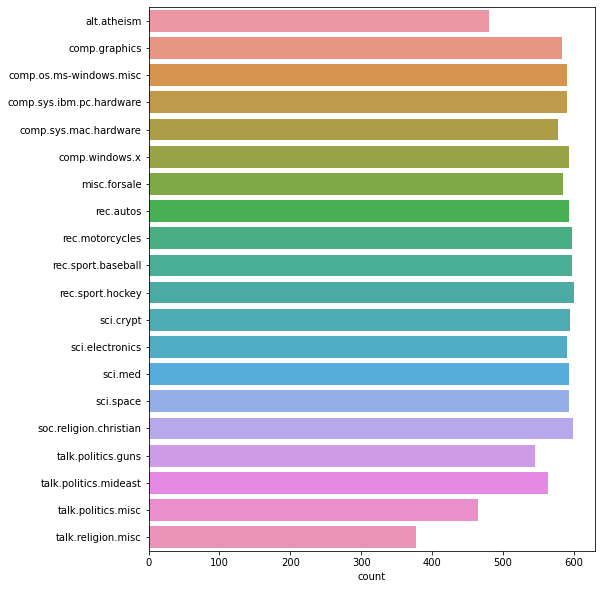

In [51]:
plt.subplots(figsize=(8,10))
pp = sns.countplot(y=Y_train)
plt.show()


In [ ]:
plt.subplots(figsize=(8,10))
pp = sns.countplot(y=Y_test)
plt.show()

# Classification Models

In [52]:
import scikitplot as skplt
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC

In [53]:
tfidf_vec = TfidfVectorizer(stop_words='english',sublinear_tf=True,ngram_range=(1, 3))
# Caculate accuracy of model
results = []
names = []
def acc_score(model):
    cv_results = cross_val_score(model,X_train,Y_train,scoring="accuracy")
    names.append(model.named_steps.model)
    results.append(cv_results)
    return np.mean(cv_results)

In [54]:
KNNparams = {
       'knnclf__n_neighbors': (5, 10, 100),
       'knnclf__weights': ('uniform', 'distance')
}
MNBparams = {
    'nbclf__alpha': (0.001, 0.01, 0.1, 0, 10)
}

## Multinomial NB Model

In [55]:
# Too long
#MNB_Pipeline = Pipeline([
#    ('cvec',vectorizer),
#    ('nbclf', MultinomialNB())])
#MNB=GridSearchCV(MNB_Pipeline, MNBparams)
#MNB.fit(X_train, Y_train)

MNB = Pipeline([
    ('tfidf',tfidf_vec), 
    ('model', MultinomialNB(alpha=0.01))
])
start = time.process_time()
MNB.fit(X_train, Y_train)
end = time.process_time()
print("Accuracy: " + str(acc_score(MNB)) + ", Time duration: " + str(end - start))

Accuracy: 0.8845674056136215, Time duration: 16.703125


In [56]:
Y_pred = MNB.predict(X_test)
print(classification_report(Y_pred,Y_test))

                          precision    recall  f1-score   support

             alt.atheism       0.83      0.87      0.85       305
           comp.graphics       0.69      0.70      0.69       380
 comp.os.ms-windows.misc       0.64      0.74      0.69       338
comp.sys.ibm.pc.hardware       0.75      0.64      0.69       455
   comp.sys.mac.hardware       0.78      0.80      0.79       375
          comp.windows.x       0.79      0.81      0.80       387
            misc.forsale       0.82      0.82      0.82       391
               rec.autos       0.88      0.89      0.88       393
         rec.motorcycles       0.95      0.93      0.94       410
      rec.sport.baseball       0.92      0.92      0.92       397
        rec.sport.hockey       0.95      0.92      0.94       411
               sci.crypt       0.92      0.86      0.89       421
         sci.electronics       0.78      0.79      0.78       388
                 sci.med       0.79      0.86      0.82       366
         

## SGD Classifier Model

In [57]:
SGDC = Pipeline([
    ('tfidf',tfidf_vec),
    ('model', SGDClassifier(max_iter = 10000))
])
start = time.process_time()
SGDC.fit(X_train, Y_train)
end = time.process_time()
print("Accuracy: " + str(acc_score(SGDC)) + ", Time duration: " + str(end - start))

Accuracy: 0.9088735757210621, Time duration: 23.9375


In [58]:
Y_pred = SGDC.predict(X_test)
print(classification_report(Y_pred,Y_test))

                          precision    recall  f1-score   support

             alt.atheism       0.77      0.82      0.79       298
           comp.graphics       0.76      0.77      0.77       384
 comp.os.ms-windows.misc       0.81      0.77      0.79       417
comp.sys.ibm.pc.hardware       0.77      0.78      0.77       388
   comp.sys.mac.hardware       0.86      0.87      0.86       381
          comp.windows.x       0.78      0.89      0.83       346
            misc.forsale       0.94      0.83      0.88       442
               rec.autos       0.92      0.94      0.93       386
         rec.motorcycles       0.96      0.97      0.96       396
      rec.sport.baseball       0.95      0.93      0.94       407
        rec.sport.hockey       0.98      0.93      0.96       423
               sci.crypt       0.96      0.91      0.93       415
         sci.electronics       0.80      0.85      0.82       369
                 sci.med       0.88      0.91      0.89       381
         

## LinearSVC

In [59]:
# SVC = Pipeline([
#     ('tfidf',tfidf_vec),
#     ('model', LinearSVC(C=10))
# ])
# start = time.process_time()
# SVC.fit(X_train, Y_train)
# end = time.process_time()
# print("Accuracy: " + str(acc_score(SVC)) + ", Time duration: " + str(end - start))

In [60]:
# Y_pred = SVC.predict(X_test)
# print(classification_report(Y_pred,Y_test))

## K Neighbors Classifier Model

In [61]:
#KNN_Pipeline = Pipeline([
#        ('tfidf',tfidf_vec), 
#        ('model', KNeighborsClassifier(n_neighbors=100))])

#start = time.process_time()
#KNN=GridSearchCV(KNN_Pipeline, KNNparams)
#KNN.fit(X_train, Y_train)
#end = time.process_time()

#print("Accuracy: " + str(acc_score(KNN)) + ", Time duration: " + str(end - start))

In [62]:
#Y_pred = KNN.predict(X_test)
#print(classification_report(Y_pred,Y_test))

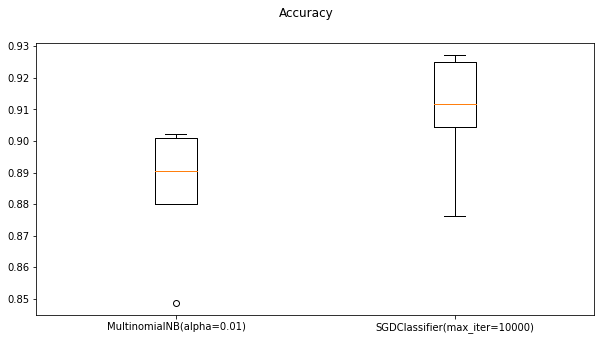

In [63]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [64]:
results

[array([0.84887318, 0.89041096, 0.90234202, 0.90101635, 0.88019452]),
 array([0.87627044, 0.91162174, 0.92487848, 0.92708794, 0.90450928])]